# Travail Pratique 3

<div class="alert alert-block alert-success">
<b>Informations générales </b>
</div>

**Professeur**: Stephan Robert

**Assistant(s)**: Arthur Babey

**Contact**: stephan.o.robert@gmail.com, arthur.babey@heig-vd.ch ou via Teams

**Rendu**:

- Date: 29 octobre
- Modalité: Travail individuel. Une fois complétées, copiez les réponses dans le ficher "**TP3_APV_S1-2024_Nom_Prenom.*****" (*** = ce que vous voulez qui soit lisible pour nous: .pdf, .html, ...) en remplaçant Nom et Prénom par les votres puis uploader votre fichier sur Cyberlearn.
- Note: Ce TP est noté sur 6, pour un poids de 12.5%

**Étudiant**:

- Julien Muhlemann

<div class="alert alert-block alert-success">

<b>But du TP </b>
</div>

- Le but de ce travail pratique est de retrouver la fonction de densité $f_{\theta}$ qui a générée un échantillon de points. Pour l'exercice 1, on va travailler avec des données discrètes et dans l'exercice 2, avec des données continues.
- Pour déterminer $f_{\theta}$, on va procéder de la manière suivante. Pour commencer, on va choisir plusieurs lois fonctions de densité candidats $f^{1}_{\theta_{1}}, \ldots f^{k}_{\theta_{k}}$.  Ensuite, on va utiliser mle pour estimer les paramètres $\theta_{1}, \ldots \theta_{k}$. Finalement, on va faire un plot de ces fonctions de densités ainsi que de la densité empirique. Finalement, en se basant sur ce graphe, on va essayer de retrouver la fonction de densité qui a générée cet échantillon.


<!---
<div class="alert alert-block alert-info">
<b>Rappel </b>
</div>
-->

<div class="alert alert-block alert-success">
<b>Table des matières </b>
</div>

Exercice 1
>* Visualisation des données
>* Estimation des paramètres
>* Représentation des distribution calculées.
>* Estimation de la distribution


Exercice 2
>* Visualisation des données
>* Estimation des paramètres
>* Représentation des distribution calculées.
>* Estimation de la distribution




## Exercice 1

Commençons par importer quelques packages.

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

Comme mentionné ci-dessus, la loi qui a générée les points présents dans le fichier 'data_ex1.pkl' est discrète.

### 1.1 Visualisation des données

Pour commencer, on va tracer la fonction de densité empirique utilisant notre échantillon.

In [18]:
file = open("./Data/data_ex1.pkl", "rb")
data = pickle.load(file)

Text(0.5, 0, 'Observations')

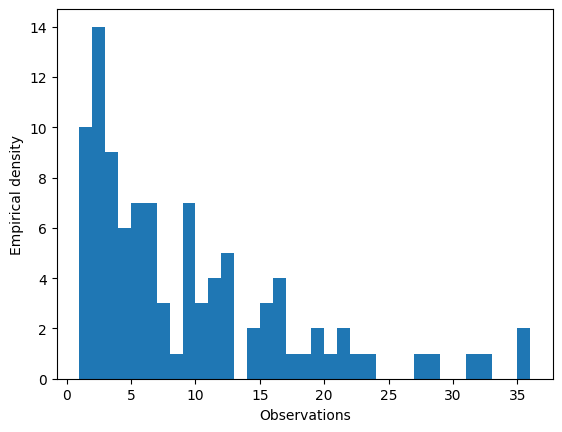

In [19]:
# TODO : faire le plot de la fonction de densité empirique
plt.hist(data, bins=35)
plt.ylabel('Empirical density')
plt.xlabel('Observations')

### 1.2 Estimation des paramètres

On va maintenant implémenter plusieurs fonctions de densités et calculer les mle des paramètres de ces fonctions de densité.

In [20]:
"""
Un exemple pour la loi de Poisson
"""

# mle_estimation
def poisson_mle(data):
    return np.mean(data)

# poisson density function
def poisson_distribution(k, lmb):
    tmp = (lmb ** k) / np.math.factorial(k)
    return tmp * np.exp(-lmb)


Procéder de la même manière pour au moins $3$ fonctions de densités différentes.

In [21]:
# TODO : implement density functions and mle estimators for at least 3 different laws.
import math
def normal_mle(data):
    mu_mle = np.mean(data)
    sigma_mle = np.std(data, ddof=1) # avec correction du biais pour échantillon
    return mu_mle, sigma_mle

def normal_distribution(x, mu, sigma):
    coefficient = 1 / (np.sqrt(2 * np.pi) * sigma)
    exponent = -((x - mu) ** 2) / (2 * sigma ** 2)
    return coefficient * np.exp(exponent)


def exponential_mle(data):
    return 1 / np.mean(data)

def exponential_distribution(x, lam):
    return lam * np.exp(-lam * x)


def binomial_mle(data, n_trials):
    p_mle = np.sum(data) / (len(data) * n_trials)
    return p_mle

def binomial_distribution(k, n, p):
    coefficient = math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
    return coefficient * (p ** k) * ((1 - p) ** (n - k))


### 1.3 Représentation des distribution calculées.

En utilisant les paramètres calculés au point précédent, tracer les distributions $f^{1}_{\theta_{1}}, \ldots f^{k}_{\theta_{k}}$ ainsi que la densité empirique. Pour alléger le graphe, vous pouvez seulemement faire un plot des points. 

C:\Users\Julien\AppData\Local\Temp\ipykernel_11644\2677365266.py:11: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  tmp = (lmb ** k) / np.math.factorial(k)


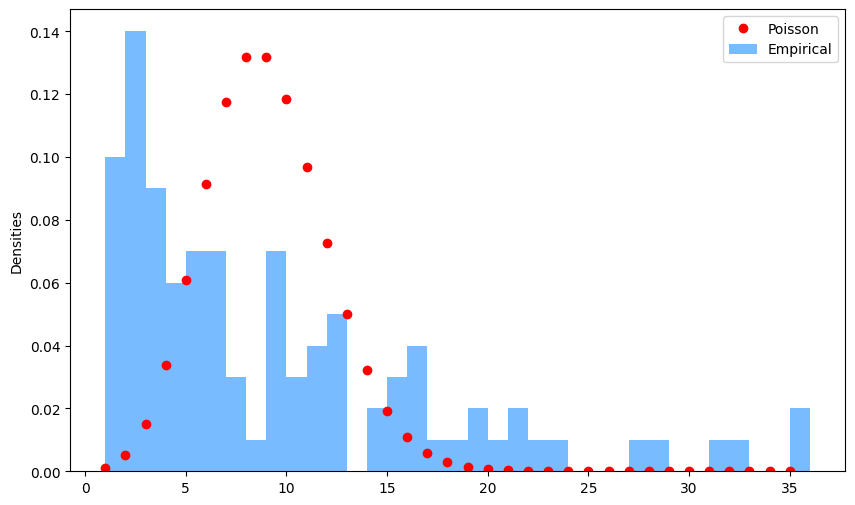

In [22]:
# TODO : plot the computed density functions and the empirical distribution


# Poisson
lmb = poisson_mle(data)
poisson_x = np.arange(1, max(data))
poisson_y = [poisson_distribution(k, lmb) for k in poisson_x]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(poisson_x, poisson_y, 'o', color='red', label='Poisson')
plt.hist(data, color='dodgerblue', bins=35, density=True, alpha=0.6, label="Empirical")
plt.ylabel('Densities')
plt.legend()
plt.show()


### 1.4 Estimation de la distribution

Selon les résulats obtenus essayer de déterminer la loi qui a générée les données présentes dans 'data_ex1.pkl' ainsi que le $\theta$ estimé.

normal MLE: mu = 8.99 , sigma = 8.214910071007928
exponential MLE: lambda = 0.11123470522803114
poisson MLE: lambda = 8.99


C:\Users\Julien\AppData\Local\Temp\ipykernel_11644\2677365266.py:11: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  tmp = (lmb ** k) / np.math.factorial(k)


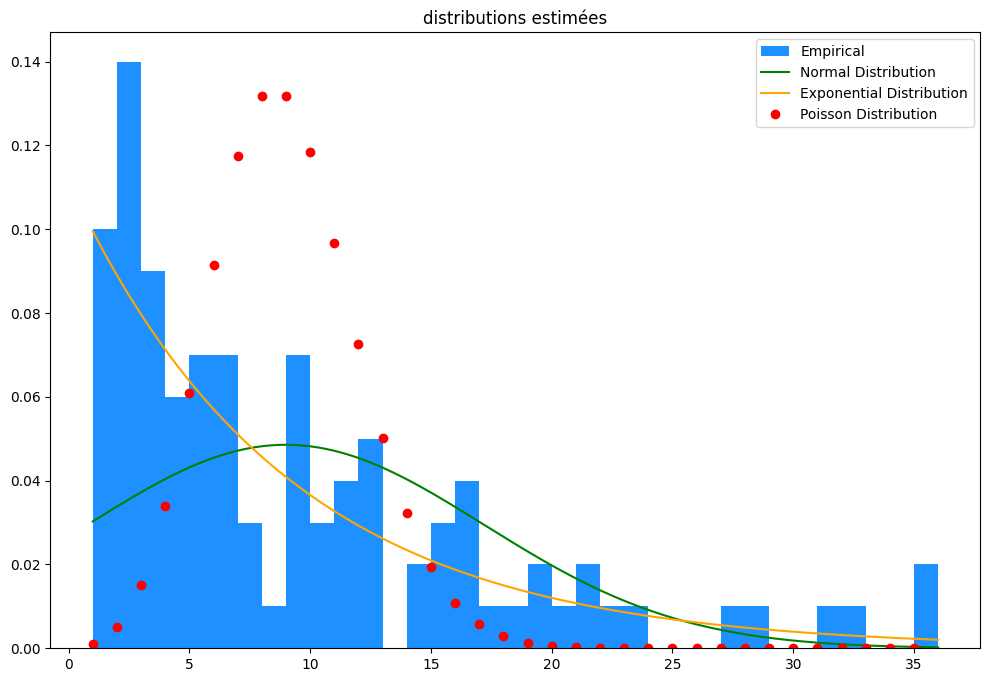

In [ ]:
# TODO: answer this question. La distribution exponentielle semble bien représenter les données. 
# malgré des valeurs outliers de 0.14 au dessus de celle-ci.

mu_mle, sigma_mle = normal_mle(data)
print("normal MLE: mu =", mu_mle, ", sigma =", sigma_mle)
lambda_mle = exponential_mle(data)
print("exponential MLE: lambda =", lambda_mle)
lambda_poisson = poisson_mle(data)
print("poisson MLE: lambda =", lambda_poisson)


x_values = np.linspace(min(data), max(data), 1000)
plt.figure(figsize=(12, 8))

plt.hist(data, bins=35, density=True,color='dodgerblue', label="Empirical")

# normal distribution with estimated parameters
plt.plot(x_values, normal_distribution(x_values, mu_mle, sigma_mle), label="Normal Distribution", color='green')

# exponential distribution with estimated lambda
plt.plot(x_values, exponential_distribution(x_values, lambda_mle), label="Exponential Distribution", color='orange')

# poisson distribution (discrete)
poisson_x = np.arange(1, max(data))
poisson_y = [poisson_distribution(k, lambda_poisson) for k in poisson_x]
plt.plot(poisson_x, poisson_y, 'o', color='red', label='Poisson Distribution')

plt.legend()
plt.title("distributions estimées")
plt.show()


## Exercice 2

Essayer de retrouver la distribution qui a générée les points présents dans le file ci-joint. Mais contrairement à l'exercice précédent, on travaille maintenant avec une distribution continue.

In [41]:
file = open("./Data/data_ex2.pkl", "rb")
data = pickle.load(file)


### 2.1 Visualisation des données

Comme d'habitude, on commence par faire le plot des données. Comme on travaille maintenant avec des données continues, il pourrait être pertinent d'utiliser des histogrammes plus petits,  (par exemple $ \sim 0.1$).

Text(0.5, 0, 'Observations')

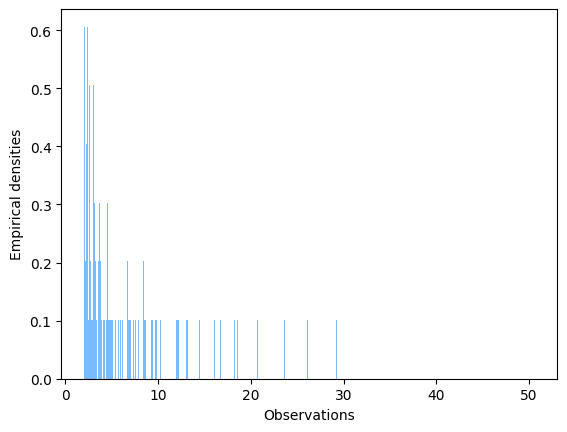

In [42]:
# TODO : plot the empirical densities
plt.hist(data, bins=np.arange(min(data), max(data), 0.1), density=True, alpha=0.6, color='dodgerblue', label="Données Empiriques")
plt.ylabel('Empirical densities')
plt.xlabel('Observations')

### 2.2 Estimation des paramètres

Répéter la même procédure qu'à l'exercice $1.2$. Comme avant, on attend que vous tester au moins $3$ distributions différentes.

In [50]:
# TODO implement some continuous density functions and their mle estimators

import math
def normal_mle(data):
    """Calculate the MLE for the parameters of a normal distribution."""
    mu_mle = np.mean(data)
    sigma_mle = np.std(data, ddof=1)  # Sample standard deviation
    return mu_mle, sigma_mle

def normal_distribution(x, mu, sigma):
    """Calculate the probability density function (PDF) of a normal distribution."""
    coefficient = 1 / (np.sqrt(2 * np.pi) * sigma)
    exponent = -((x - mu) ** 2) / (2 * sigma ** 2)
    return coefficient * np.exp(exponent)

def exponential_mle(data):
    """Calculate the MLE for the rate parameter of an exponential distribution."""
    return 1 / np.mean(data)  # λ is the inverse of the mean

def exponential_distribution(x, lam):
    """Calculate the probability density function (PDF) of an exponential distribution."""
    return np.where(x < 0, 0, lam * np.exp(-lam * x))  # Return 0 for negative x, else return PDF

def lognormal_mle(data):
    """Calculate MLE for the parameters of the Log-Normal distribution."""
    log_data = np.log(data)
    mu_mle = np.mean(log_data)
    sigma_mle = np.std(log_data, ddof=1)  # Sample standard deviation
    return mu_mle, sigma_mle

def lognormal_distribution(x, mu, sigma):
    """Calculate the PDF of the Log-Normal distribution."""
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x) - mu) ** 2) / (2 * sigma ** 2))


### 2.3 Représentation des distribution calculées.

En utilisant les paramètres calculés au point précédent, tracer les distributions $f^{1}_{\theta_{1}}, \ldots f^{k}_{\theta_{k}}$.

Normal MLE: mu = 7.140390353213095 , sigma = 8.122856722995142
Exponential MLE: lambda = 0.14004836578017213
Log-Normal MLE: mu = 1.608950356453052 , sigma = 0.7671299298300762


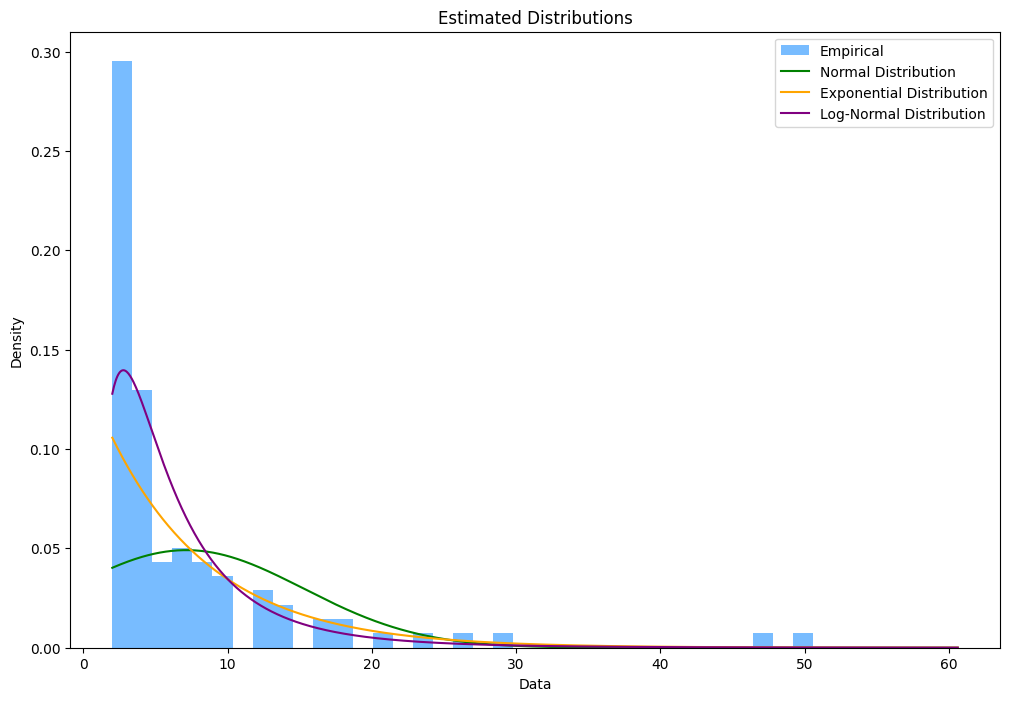

In [51]:
# TODO : plot the computed density functions and the empirical density

# Estimate parameters
mu_mle, sigma_mle = normal_mle(data)
print("Normal MLE: mu =", mu_mle, ", sigma =", sigma_mle)

lambda_mle = exponential_mle(data)
print("Exponential MLE: lambda =", lambda_mle)

mu_lognormal, sigma_lognormal = lognormal_mle(data)
print("Log-Normal MLE: mu =", mu_lognormal, ", sigma =", sigma_lognormal)

# Prepare for plotting
x_values = np.linspace(min(data), max(data) + 10, 1000)
plt.figure(figsize=(12, 8))

# Plot empirical histogram
plt.hist(data, bins=35, density=True, color='dodgerblue', label="Empirical", alpha=0.6)

# Normal distribution with estimated parameters
plt.plot(x_values, normal_distribution(x_values, mu_mle, sigma_mle), label="Normal Distribution", color='green')

# Exponential distribution with estimated lambda
plt.plot(x_values, exponential_distribution(x_values, lambda_mle), label="Exponential Distribution", color='orange')

# Log-Normal distribution with estimated parameters
plt.plot(x_values, lognormal_distribution(x_values, mu_lognormal, sigma_lognormal), label="Log-Normal Distribution", color='purple')

# Configure plot
plt.legend()
plt.title("Estimated Distributions")
plt.xlabel("Data")
plt.ylabel("Density")
plt.show()

### 2.4 Estimation de la fonction de densité

Selon les résulats obtenus essayer de déterminer la distribution qui a générée les données présentes dans 'data_ex2.pkl' ainsi que le $\theta$ estimé.

In [ ]:
# TODO : answer this question.

